# 2018 CAASPP Scores

Welcome to my exploration of test scores from the 2018 CAASPP testing season! Since I, too, had to take this assessment at some point in high school, I want to make use of the data and see how the scores compare between schools - specifically, between public and charter schools. Hopefully, this will give us information on how students in schools with different structures of education systems perform.

I will be referring to certain columns in the data that aren't clear-cut, so the definitions of each column can be found [here](#https://caaspp.cde.ca.gov/sb2018/research_fixfileformat18).

Since we'll be working with dataframes, we need to import the pandas library in order to create and manipulate dataframes based on our csv files.
We're also going to be looking at statistics of the scores, so we'll need the numpy library to determine statistical values.

We will import the StatsModels library for doing statistics in Python, and matplotlib and seaborn are for visualizations of our data towards the end.

In [1]:
import pandas as pd
import numpy as np 

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

Now we can open our csv files as dataframes.

In [2]:
file = pd.read_csv("2018/comma_delimited/csv.txt", delimiter=",", sep=" ")
file_info = pd.read_csv("2018/comma_delimited/csv_entities.txt", delimiter=",", sep=" ", encoding='latin-1')

Since our data has a lot of extraneous information that we don't need, we're going to do some cleaning of the data by removing unnecessary columns and sorting by relevant attributes - School Code (in order to merge the data and its entities), Grade, and Test ID (type of assessment).

One thing you will notice that I also removed Area Percentages. These areas are described [here](#https://caaspp.cde.ca.gov/sb2018/UnderstandingCAASPPReports) and are much more specific in performance per school, so since we want to generalize performance between schools, we will ignore this data.

In [3]:
file_info = file_info.drop('Filler', axis=1)
file_info = file_info.drop(["County Code", "District Code", "Test Year"], axis=1)
file_info = file_info[file_info["School Code"] != 0]
file_info = file_info.dropna()
file_info = file_info.sort_values(by="School Code")
file_info = file_info.reset_index()
file_info.head()

,index,School Code,Type Id,County Name,District Name,School Name,Zip Code
0,4473,100016,9,Madera,Sherman Thomas Charter,Sherman Thomas Charter,93638
1,934,100024,7,El Dorado,Buckeye Union Elementary,Oak Meadow Elementary,95762
2,6637,100040,7,Sacramento,Galt Joint Union Elementary,Robert L. Mccaffrey Middle,95632
3,5972,100057,7,Plumas,Plumas County Office Of Education,Plumas County Community,95971
4,221,100065,9,Alameda,Oakland Unity High,Oakland Unity High,94605


In [4]:
file = file.drop('Filler', axis=1)
file = file.drop(["County Code", "District Code", "Test Year", "Subgroup ID"], axis=1)
file = file.drop(["Area 1 Percentage Above Standard", "Area 1 Percentage Near Standard", "Area 1 Percentage Below Standard", "Area 2 Percentage Above Standard", "Area 2 Percentage Near Standard", "Area 2 Percentage Below Standard", "Area 3 Percentage Above Standard", "Area 3 Percentage Near Standard", "Area 3 Percentage Below Standard", "Area 4 Percentage Above Standard", "Area 4 Percentage Near Standard", "Area 4 Percentage Below Standard"], axis=1)
file = file.drop(file[file['Students Tested']=='*'].index)
file = file[file["School Code"] != 0]
file = file.dropna()
file = file.sort_values(by=["School Code", "Grade", "Test Id"])
file = file.reset_index()
file.head()

,index,School Code,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores
0,39065,100016,B,139,139,3,1,22,22,2432.6,9.09,54.55,63.64,13.64,22.73,22
1,39066,100016,B,139,139,3,2,22,22,2412.2,13.64,18.18,31.82,36.36,31.82,22
2,39067,100016,B,139,139,4,1,28,27,2466.8,25.93,22.22,48.15,14.81,37.04,27
3,39068,100016,B,139,139,4,2,28,27,2454.1,3.70,37.04,40.74,25.93,33.33,27
4,39069,100016,B,139,139,5,1,25,25,2461.9,4.00,32.00,36.00,16.00,48.00,25


We now want to separate the entities by public and charter schools so we can then merge the scores and label our data.

In [5]:
charter_schools = file_info[file_info["Type Id"] >= 9]
charter_schools.head()

,index,School Code,Type Id,County Name,District Name,School Name,Zip Code
0,4473,100016,9,Madera,Sherman Thomas Charter,Sherman Thomas Charter,93638
4,221,100065,9,Alameda,Oakland Unity High,Oakland Unity High,94605
8,222,100123,9,Alameda,East Oakland Leadership Academy,East Oakland Leadership Academy,94605
9,2018,100156,10,Kings,Lemoore Union Elementary,Lemoore University Elementary Charter,93245
17,2786,100289,9,Los Angeles,N.E.W. Academy Of Science And Arts,N.E.W. Academy Of Science And Arts,90017


In [6]:
public_schools = file_info[file_info["Type Id"] == 7]
public_schools.head()

,index,School Code,Type Id,County Name,District Name,School Name,Zip Code
1,934,100024,7,El Dorado,Buckeye Union Elementary,Oak Meadow Elementary,95762
2,6637,100040,7,Sacramento,Galt Joint Union Elementary,Robert L. Mccaffrey Middle,95632
3,5972,100057,7,Plumas,Plumas County Office Of Education,Plumas County Community,95971
5,2187,100081,7,Los Angeles,Antelope Valley Union High,William J. (Pete) Knight High,93552
6,7212,100107,7,San Bernardino,Ontario-Montclair,Vista Grande Elementary,91762


This is where we merge our data into our new dataframes.

In [7]:
charter_school_data = file.merge(charter_schools, on='School Code').drop(['index_x', 'index_y'], axis=1)
charter_school_data.head()

,School Code,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Type Id,County Name,District Name,School Name,Zip Code
0,100016,B,139,139,3,1,22,22,2432.6,9.09,54.55,63.64,13.64,22.73,22,9,Madera,Sherman Thomas Charter,Sherman Thomas Charter,93638
1,100016,B,139,139,3,2,22,22,2412.2,13.64,18.18,31.82,36.36,31.82,22,9,Madera,Sherman Thomas Charter,Sherman Thomas Charter,93638
2,100016,B,139,139,4,1,28,27,2466.8,25.93,22.22,48.15,14.81,37.04,27,9,Madera,Sherman Thomas Charter,Sherman Thomas Charter,93638
3,100016,B,139,139,4,2,28,27,2454.1,3.70,37.04,40.74,25.93,33.33,27,9,Madera,Sherman Thomas Charter,Sherman Thomas Charter,93638
4,100016,B,139,139,5,1,25,25,2461.9,4.00,32.00,36.00,16.00,48.00,25,9,Madera,Sherman Thomas Charter,Sherman Thomas Charter,93638


In [8]:
public_school_data = file.merge(public_schools, on='School Code').drop(['index_x', 'index_y'], axis=1)
public_school_data.head()

,School Code,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Type Id,County Name,District Name,School Name,Zip Code
0,100024,B,383,383,3,1,99,98,2480.8,50.00,26.53,76.53,17.35,6.12,98,7,El Dorado,Buckeye Union Elementary,Oak Meadow Elementary,95762
1,100024,B,385,385,3,2,99,98,2475.0,41.84,32.65,74.49,17.35,8.16,98,7,El Dorado,Buckeye Union Elementary,Oak Meadow Elementary,95762
2,100024,B,383,383,4,1,128,126,2547.8,63.49,26.98,90.48,5.56,3.97,126,7,El Dorado,Buckeye Union Elementary,Oak Meadow Elementary,95762
3,100024,B,385,385,4,2,128,127,2546.7,48.82,40.16,88.98,8.66,2.36,127,7,El Dorado,Buckeye Union Elementary,Oak Meadow Elementary,95762
4,100024,B,383,383,5,1,161,159,2571.7,46.54,35.85,82.39,11.95,5.66,159,7,El Dorado,Buckeye Union Elementary,Oak Meadow Elementary,95762


Now we will look at the mean scores in each subject.

In [9]:
public_school_english = public_school_data[public_school_data["Test Id"] == 1]
public_school_math = public_school_data[public_school_data["Test Id"] == 2]

charter_school_english = charter_school_data[charter_school_data["Test Id"] == 1]
charter_school_math = charter_school_data[charter_school_data["Test Id"] == 2]

In [10]:
public_school_english_mean = np.mean(public_school_english["Mean Scale Score"].astype(float))
charter_school_english_mean = np.mean(charter_school_english["Mean Scale Score"].astype(float))

print("English Language Arts/Literacy Mean Scores")
print("Public School: " + str(public_school_english_mean))
print("Charter School: " + str(charter_school_english_mean))

English Language Arts/Literacy Mean Scores
Public School: 2487.691795124764
Charter School: 2509.1223082336464


In [11]:
public_school_math_mean = np.mean(public_school_math["Mean Scale Score"].astype(float))
charter_school_math_mean = np.mean(charter_school_math["Mean Scale Score"].astype(float))

print("Mathematics Mean Scores")
print("Public School: " + str(public_school_math_mean))
print("Charter School: " + str(charter_school_math_mean))

Mathematics Mean Scores
Public School: 2482.1506905623137
Charter School: 2494.133278573107


In [12]:
public_school_english_met = np.mean(public_school_english["Percentage Standard Met and Above"].astype(float))
charter_school_english_met = np.mean(charter_school_english["Percentage Standard Met and Above"].astype(float))

print("Percentage of Students that Met or Exceeded English Language Arts/Literacy Standards")
print("Public School: " + str(public_school_english_met))
print("Charter School: " + str(charter_school_english_met))

Percentage of Students that Met or Exceeded English Language Arts/Literacy Standards
Public School: 47.23017223660962
Charter School: 48.493070607553456


In [13]:
public_school_math_met = np.mean(public_school_math["Percentage Standard Met and Above"].astype(float))
charter_school_math_met = np.mean(charter_school_math["Percentage Standard Met and Above"].astype(float))

print("Percentage of Students that Met or Exceeded Mathematics Standards")
print("Public School: " + str(public_school_math_met))
print("Charter School: " + str(charter_school_math_met))

Percentage of Students that Met or Exceeded Mathematics Standards
Public School: 38.41453304833945
Charter School: 35.50923726824682


So, based on the mean scores, we see that charter schools perform better than public schools for the most part. However, mean scores aren't everything, considering that enrollment is different along with how well or how poorly each student performed.

We will now perform hypothesis testing based on a quantitative question: 

Is the proportion of students at charter schools that are meeting the standard significantly larger than the proportion of students at public schools that are meeting the standard?

In [14]:
# hypothesis testing: apply z-test on equality of proportions to compare:
# 1. scores between public and charter schools
# 2. scores between 2017 and 2018

In [15]:
public_school_standard_met = 0
charter_school_standard_met = 0

public_school_students_tested = sum(public_school_data["Students Tested"].astype(int))
charter_school_students_tested = sum(charter_school_data["Students Tested"].astype(int))

for i in public_school_data.index:
    try:
        public_school_standard_met += int(int(round(float(public_school_data["Students Tested"][i]))) / int(round(float(public_school_data["Percentage Standard Met and Above"][i]))))
    except:
        pass

for i in charter_school_data.index:
    try:
        charter_school_standard_met += int(int(round(float(charter_school_data["Students Tested"][i]))) / int(round(float(charter_school_data["Percentage Standard Met and Above"][i]))))
    except:
        pass
    
null_hypothesis = "public_school_standard_met=charter_school_standard_met"
alt_hypothesis = "public_school_standard_met<charter_school_standard_met"

print(public_school_standard_met)
print(charter_school_standard_met)
print(public_school_students_tested)
print(charter_school_students_tested)

169330
19602
5717006
622342


In [16]:
# z-test

ztest_exam = sm.stats.proportions_ztest([public_school_standard_met, charter_school_standard_met], [public_school_students_tested, charter_school_students_tested], alternative='smaller')
ztest_exam

(-8.276135831491297, 6.361842511448383e-17)

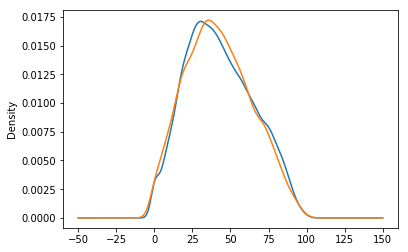

In [17]:
public_school_plot = (public_school_data["Percentage Standard Met and Above"].astype(float)).plot(kind='density');
charter_school_plot = (charter_school_data["Percentage Standard Met and Above"].astype(float)).plot(kind='density');

What we notice here is that the p-value is below 0.05 and therefore we will have to reject the null hypothesis, bringing us to the conclusion that the proportion of students at charter schools that are meeting the standard is greater than the proportion of students at public schools that are meeting the standard.

This raises the question: do charter schools help students exceed the expectations? Are most students performing average at best, or are many exceeding while others are not meeting the goals? The same goes for public schools, are there more students excelling than at charter schools?

Let's perform another hypothesis test, but this time focusing on the percentage of students exceeding.

In [18]:
public_school_standard_exceeded = 0
charter_school_standard_exceeded = 0

for i in public_school_data.index:
    try:
        public_school_standard_exceeded += int(int(round(float(public_school_data["Students Tested"][i]))) / int(round(float(public_school_data["Percentage Standard Exceeded"][i]))))
    except:
        pass
    
for i in charter_school_data.index:
    try:
        charter_school_standard_exceeded += int(int(round(float(charter_school_data["Students Tested"][i]))) / int(round(float(charter_school_data["Percentage Standard Exceeded"][i]))))
    except:
        pass
    
null_hypothesis = "public_school_standard_exceeded=charter_school_standard_met"
alt_hypothesis = "public_school_standard_exceeded>charter_school_standard_met"

In [19]:
ztest_exam = sm.stats.proportions_ztest([public_school_standard_exceeded, charter_school_standard_exceeded], [public_school_students_tested, charter_school_students_tested], alternative='larger')
ztest_exam

(16.230808965060703, 1.527038627733469e-59)

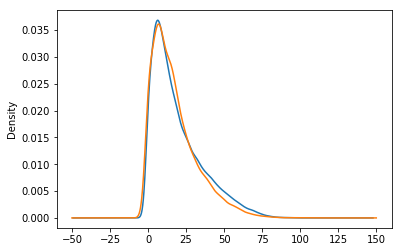

In [20]:
public_school_exceeding_plot = (public_school_data["Percentage Standard Exceeded"].astype(float)).plot(kind='density');
charter_school_exceeding_plot = (charter_school_data["Percentage Standard Exceeded"].astype(float)).plot(kind='density');

This time, our p-value is again less than 0.05, meaning that we will also have to reject our null hypothesis. This shows that a larger proportion of public school students exceeded standards than charter school students.